# Random Forest

## Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import random
import counting_fns as cf


# List of all the months
months = ['2_June', '3_July', '4_August', '5_September', '6_October']

# Define the path to the data directory and columns to keep
data_path = "/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month"


In [2]:
# Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
# Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

## Filter Columns

In [3]:
# Filter Columns
filter = ['session_time', 'gender', 'age_gen', 'day', 'timeofday', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet',
        'w/min', 'l/min', 'nh/min', 'd/min', '2ws_profit', '2ws_wgramt','2ws/min', 
        '3ws_profit', '3ws_wgramt', '3ws/min', '4ws_profit', '4ws_wgramt', '4ws/min', 
        'w/g', 'l/g', 'nh/g', 'd/g', 'ave_time_per_gamble',
        'min_time_per_gamble', 'machines_changes', 'unique_machines', 'classification']


## June

In [4]:
training = ['6_October', '3_July', '4_August', '5_September']
testing = ['2_June']
june_test, jn_y_test, jn_y_pred, jn_x_test , jn_df, jn_classifier, ct = cf.run_rf_combine(months, data_path, filter, months_train=training, months_test=testing, params = best_params)

print(june_test.to_latex(index=False))

[[235   4]
 [ 17  11]]
\begin{tabular}{lrrrr}
\toprule
Test Month &  Accuracy &  Precision &  Recall &  F1 Score \\
\midrule
      June &     0.921 &      0.833 &   0.688 &     0.734 \\
\bottomrule
\end{tabular}



/var/folders/vp/1skwx2kd29s4fxnxx7tt9r6w0000gn/T/ipykernel_2588/1280273699.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(june_test.to_latex(index=False))


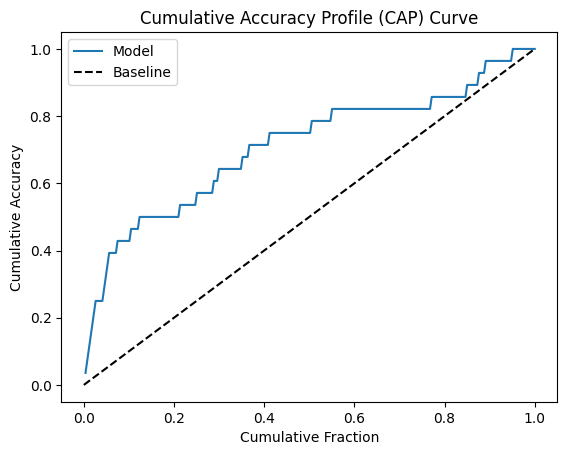

In [5]:
cf.plot_cap_curve(jn_y_test, jn_y_pred)

In [6]:
june_features = cf.permutation_importance_rf(jn_df, jn_x_test, jn_y_test, jn_classifier, ct)

In [7]:
print(june_features.head(5))

            feature  coefficient
0        2ws_profit     0.015730
1  min_theo_payback    -0.009363
2  machines_changes    -0.008614
3  max_theo_payback    -0.006367
4   unique_machines    -0.006367


## July

In [8]:
training = ['2_June', '4_August', '5_September', '6_October']
testing = ['3_July']

july_test, jl_y_test, jl_y_pred, jl_x_test , jl_df, jl_classifier, ct = cf.run_rf_combine(months, data_path, filter, months_train=training, months_test=testing, params = best_params)

print(july_test.to_latex(index=False))

[[11359   665]
 [  490   964]]
\begin{tabular}{lrrrr}
\toprule
Test Month &  Accuracy &  Precision &  Recall &  F1 Score \\
\midrule
      July &     0.914 &      0.775 &   0.804 &     0.788 \\
\bottomrule
\end{tabular}



/var/folders/vp/1skwx2kd29s4fxnxx7tt9r6w0000gn/T/ipykernel_2588/2408664308.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(july_test.to_latex(index=False))


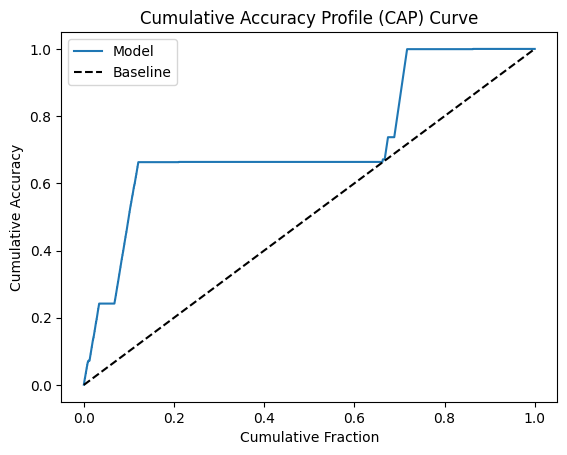

In [9]:
cf.plot_cap_curve(jl_y_test, jl_y_pred)

In [10]:
july_features = cf.permutation_importance_rf(jl_df, jl_x_test, jl_y_test, jl_classifier, ct)

In [11]:
print(july_features.head(5))

      feature  coefficient
0  3ws_wgramt    -0.007293
1  3ws_profit    -0.006544
2         w/g     0.005973
3     3ws/min     0.004385
4  2ws_wgramt    -0.004073


## August

In [12]:
training = ['2_June', '3_July', '5_September', '6_October']
testing = ['4_August']

august_test, ag_y_test, ag_y_pred, ag_x_test , ag_df, ag_classifier, ct = cf.run_rf_combine(months, data_path, filter, months_train=training, months_test=testing, params = best_params)

print(august_test.to_latex(index=False))

[[10233   473]
 [  443   851]]
\begin{tabular}{lrrrr}
\toprule
Test Month &  Accuracy &  Precision &  Recall &  F1 Score \\
\midrule
    August &     0.924 &      0.801 &   0.807 &     0.804 \\
\bottomrule
\end{tabular}



/var/folders/vp/1skwx2kd29s4fxnxx7tt9r6w0000gn/T/ipykernel_2588/4157897949.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(august_test.to_latex(index=False))


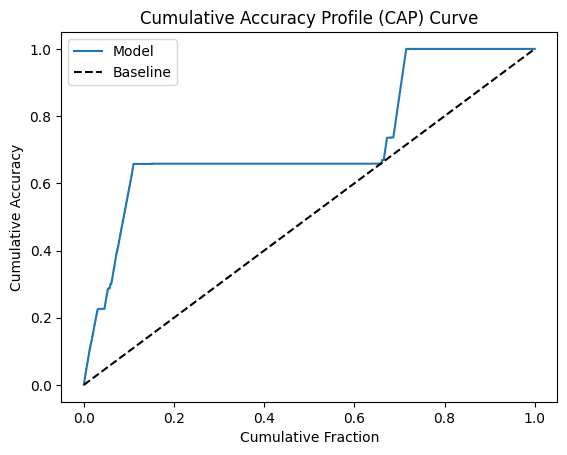

In [13]:
cf.plot_cap_curve(ag_y_test, ag_y_pred)

In [14]:
august_features = cf.permutation_importance_rf(ag_df, ag_x_test, ag_y_test, ag_classifier, ct)

In [15]:
print(august_features.head(5))

      feature  coefficient
0  2ws_profit     0.008167
1         w/g     0.005942
2  3ws_wgramt    -0.005642
3  3ws_profit    -0.003908
4  2ws_wgramt     0.002858


## September

In [16]:
training = ['2_June', '3_July', '4_August', '6_October']
testing = ['5_September']

september_test, sp_y_test, sp_y_pred, sp_x_test , sp_df, sp_classifier, ct = cf.run_rf_combine(months, data_path, filter, months_train=training, months_test=testing, params = best_params)

print(september_test.to_latex(index=False))

[[9368  536]
 [ 357  850]]
\begin{tabular}{lrrrr}
\toprule
Test Month &  Accuracy &  Precision &  Recall &  F1 Score \\
\midrule
 September &      0.92 &      0.788 &   0.825 &     0.805 \\
\bottomrule
\end{tabular}



/var/folders/vp/1skwx2kd29s4fxnxx7tt9r6w0000gn/T/ipykernel_2588/2601704095.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(september_test.to_latex(index=False))


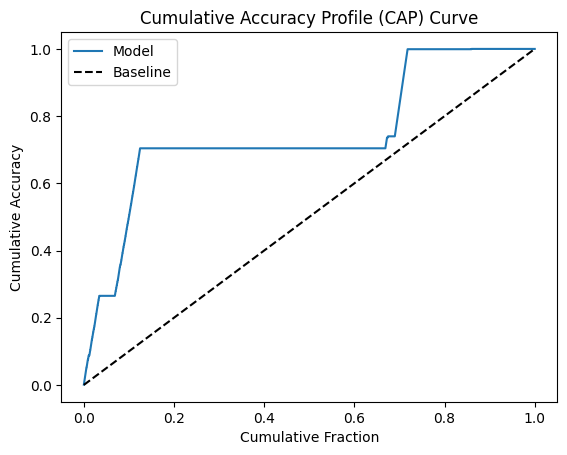

In [17]:
cf.plot_cap_curve(sp_y_test, sp_y_pred)

In [18]:
september_features = cf.permutation_importance_rf(sp_df, sp_x_test, sp_y_test, sp_classifier, ct)

In [19]:
print(september_features.head(5))

      feature  coefficient
0  3ws_profit    -0.006930
1  3ws_wgramt    -0.006156
2  2ws_profit     0.005670
3         w/g     0.005148
4     3ws/min     0.003582


## October

In [20]:
training = ['2_June', '3_July', '4_August', '5_September']
testing = ['6_October']

october_test, oc_y_test, oc_y_pred, oc_x_test , oc_df, oc_classifier, ct = cf.run_rf_combine(months, data_path, filter, months_train=training, months_test=testing, params = best_params)

print(october_test.to_latex(index=False))

[[4713  226]
 [ 200  385]]
\begin{tabular}{lrrrr}
\toprule
Test Month &  Accuracy &  Precision &  Recall &  F1 Score \\
\midrule
   October &     0.923 &      0.795 &   0.806 &       0.8 \\
\bottomrule
\end{tabular}



/var/folders/vp/1skwx2kd29s4fxnxx7tt9r6w0000gn/T/ipykernel_2588/2270440204.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(october_test.to_latex(index=False))


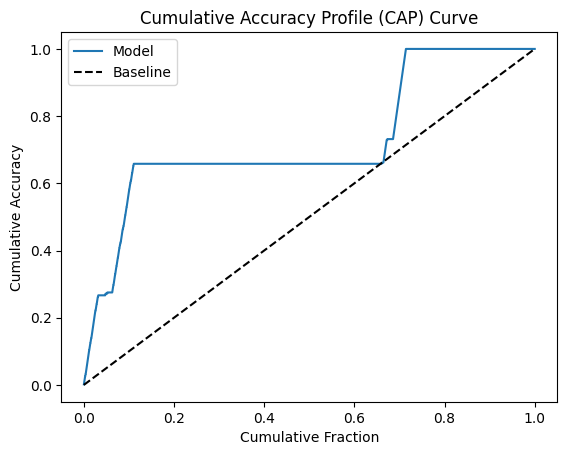

In [21]:
cf.plot_cap_curve(oc_y_test, oc_y_pred)

In [22]:
october_features = cf.permutation_importance_rf(oc_df, oc_x_test, oc_y_test, oc_classifier, ct)

In [23]:
print(october_features.head(5))

      feature  coefficient
0         w/g     0.008870
1  2ws_profit     0.006589
2  3ws_profit    -0.005286
3  3ws_wgramt    -0.004978
4  max_profit    -0.003928


## Save Dataframes

In [24]:
os.chdir('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/Feauture Importance/Overall/RF')
june_features.to_csv('june_features.csv')
july_features.to_csv('july_features.csv')
august_features.to_csv('august_features.csv')
september_features.to_csv('september_features.csv')
october_features.to_csv('october_features.csv')